# Support Vector Machine Tutorial Using Python Sklearn

<img height=300 width=300 src="iris_petal_sepal.png" />

# Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
'''
0 = setosa
1 = versicolor
2 = virginica
'''
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Creating dataframe from Iris dataset

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df[df.target.eq(2)].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [14]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Visualization of Dataset

In [15]:
# Creating three separate dataframes
df0 = df[df.target.eq(0)]
df1 = df[df.target.eq(1)]
df2 = df[df.target.eq(2)]

In [16]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [18]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


## Sepal length vs Sepal Width (Setosa vs Versicolor)

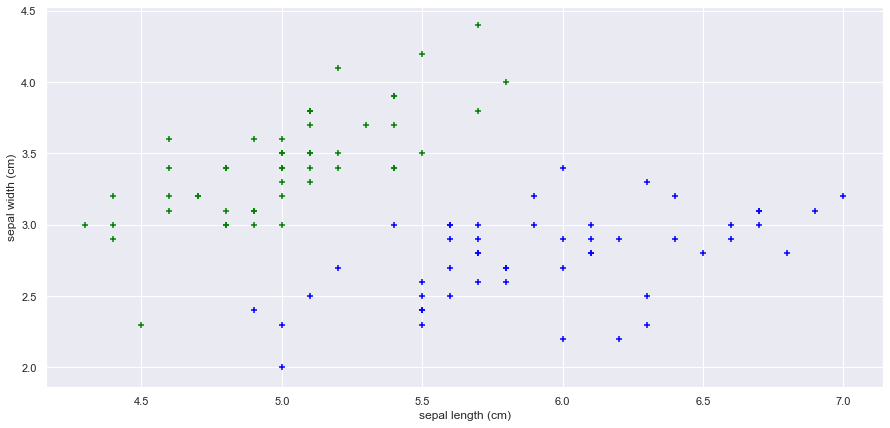

In [22]:
plt.figure(figsize=(15,7))
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')

## Petal length vs Petal Width (Setosa vs Versicolor)

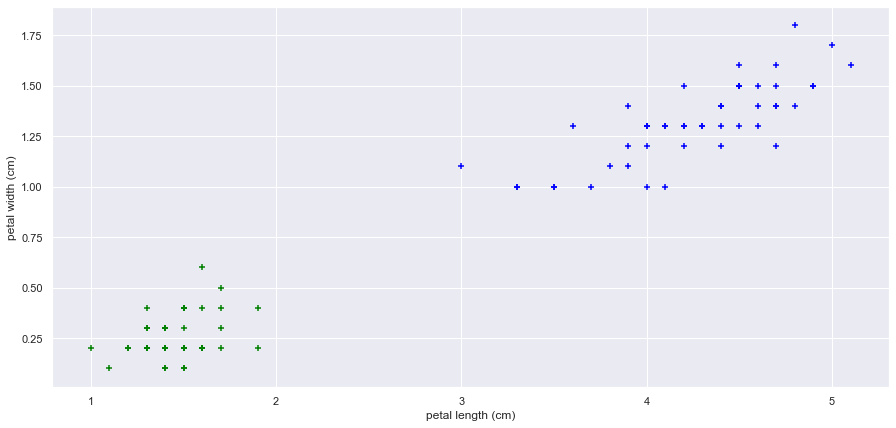

In [34]:
plt.figure(figsize=(15,7))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+')

# Separating Dataset into Train and Test

In [24]:
from sklearn.model_selection import train_test_split

### Checking for NaN

In [27]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Separating X and y

In [25]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## Train and Test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
len(X_train)

120

In [30]:
len(X_test)

30

# Creating the SVM Model

In [31]:
from sklearn.svm import SVC
model = SVC()

In [32]:
model.fit(X_train, y_train)

SVC()

In [33]:
model.score(X_test, y_test)

0.9

In [35]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

# Tune parameters

## 1. Regularization (C)

In [36]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9

In [38]:
model_C = SVC(C=5)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [39]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

## 2. Gamma

In [40]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

In [42]:
model_g = SVC(gamma=5)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

## 3. Kernel

In [43]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

In [44]:
model_poly_kernal = SVC(kernel='poly')
model_poly_kernal.fit(X_train, y_train)
model_poly_kernal.score(X_test, y_test)

0.9333333333333333

In [45]:
model_rbf_kernal = SVC(kernel='rbf')
model_rbf_kernal.fit(X_train, y_train)
model_rbf_kernal.score(X_test, y_test)

0.9

In [46]:
model_sigmoid_kernal = SVC(kernel='sigmoid')
model_sigmoid_kernal.fit(X_train, y_train)
model_sigmoid_kernal.score(X_test, y_test)

0.16666666666666666